In [1]:
import pandas as pd

In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
#verificando valores nulos
treino.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
#verificando os valores nulos como porcentagem
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

#### Poderíamos pensar que o fato dos valores serem vazios, poderia ser uma falta de informação, mas olhando melhor, vemos que esse não é o caso:
##### PoolQC: indica a qualidade da piscina 

##### Assim como para MiscFeature, Alley, Fence

##### Essas informações, na verdade, são muito importantes e ajudarão a precificar a casa

In [6]:
#substituindo os valores vazios por -1
treino[['PoolQC','MiscFeature','Alley','Fence']] = treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

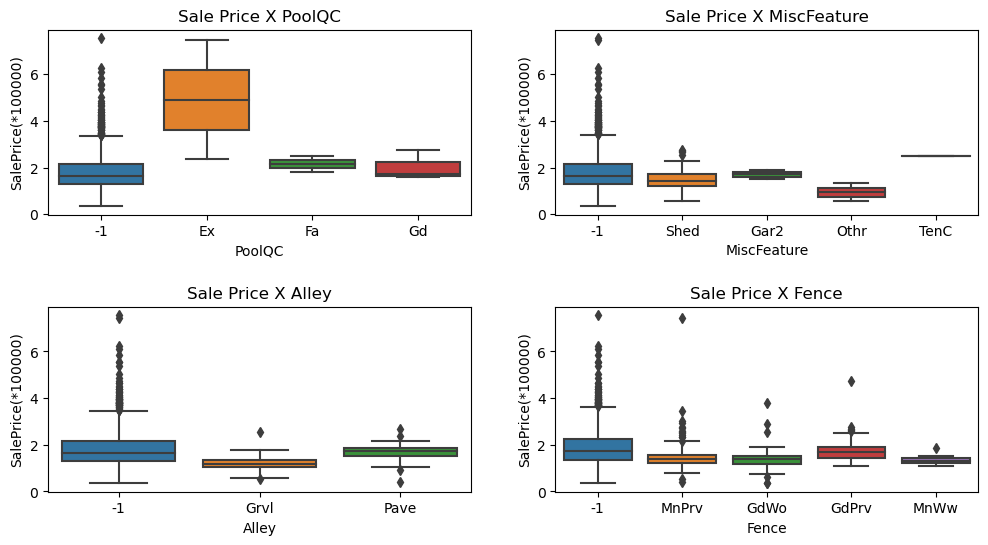

In [8]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,6))

sns.boxplot(x = treino.PoolQC,y = treino.SalePrice/100000,ax=ax[0,0])
ax[0,0].set_ylabel('SalePrice(*100000)')
ax[0,0].set_title('Sale Price X PoolQC')
sns.boxplot(x = treino.MiscFeature,y = treino.SalePrice/100000,ax=ax[0,1])
ax[0,1].set_ylabel('SalePrice(*100000)')
ax[0,1].set_title('Sale Price X MiscFeature')
sns.boxplot(x = treino.Alley,y = treino.SalePrice/100000,ax=ax[1,0])
ax[1,0].set_ylabel('SalePrice(*100000)')
ax[1,0].set_title('Sale Price X Alley')
sns.boxplot(x = treino.Fence,y = treino.SalePrice/100000,ax=ax[1,1])
ax[1,1].set_ylabel('SalePrice(*100000)')
ax[1,1].set_title('Sale Price X Fence')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [9]:
#fazendo os mesmos tratamentos para a base de teste
teste.shape

(1459, 80)

In [10]:
teste[['PoolQC','MiscFeature','Alley','Fence']] = teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [11]:
teste.shape

(1459, 80)

In [12]:
treino[['Fireplaces','FireplaceQu']].value_counts(dropna=False)
# o valor NA aqui também significa ausência, no caso, ausência de lareira

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
dtype: int64

In [13]:
treino[['FireplaceQu']] = treino[['FireplaceQu']].fillna(-1)

In [14]:
teste[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
dtype: int64

In [15]:
teste[['FireplaceQu']] = teste[['FireplaceQu']].fillna(-1)

In [18]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(10)

LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtFinType1    0.025342
dtype: float64

In [19]:
treino.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageFinish     81
GarageCond       81
GarageYrBlt      81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
dtype: int64

##### LotFrontage -  quão conectada a rua esta casa está

In [20]:
treino.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [22]:
treino.loc[treino.LotFrontage.isnull(),'LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [23]:
treino.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

In [24]:
treino.groupby('LotConfig')['LotFrontage'].min()

LotConfig
Corner     24.0
CulDSac    30.0
FR2        24.0
FR3        35.0
Inside     21.0
Name: LotFrontage, dtype: float64

#### valores vazios aqui poderiam indicar que a casa não tem nenhuma conexão com a rua mas sabemos que isso não é possível, portanto, esses valores vazios parecem ter sido um erro da base

In [34]:
#susbtituição dos valores vazios pela média
treino['LotFrontage'] = treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))

In [35]:
teste['LotFrontage'] = treino['LotFrontage'].fillna(teste.groupby('LotConfig')['LotFrontage'].transform('mean'))

In [40]:
#verificando todas as colunas que tem Garage no nome
col_garage = treino.columns[treino.columns.str.contains('Garage')]
col_garage

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [42]:
treino.loc[:,col_garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,TA,TA
1456,Attchd,1978.0,Unf,2,500,TA,TA
1457,Attchd,1941.0,RFn,1,252,TA,TA
1458,Attchd,1950.0,Unf,1,240,TA,TA


In [44]:
treino.loc[treino.GarageType.isnull(),col_garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [46]:
treino.loc[treino.GarageType.isnull(),col_garage].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
dtype: int64

In [47]:
treino.loc[treino.GarageYrBlt.isnull(),col_garage].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
dtype: int64

In [48]:
treino.loc[treino.GarageFinish.isnull(),col_garage].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
dtype: int64

In [49]:
treino.loc[treino.GarageCars.isnull(),col_garage].value_counts(dropna=False)

Series([], dtype: int64)

In [50]:
treino.loc[treino.GarageQual.isnull(),col_garage].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
dtype: int64

In [51]:
treino.loc[treino.GarageCars.isnull(),col_garage].value_counts(dropna=False)

Series([], dtype: int64)

#### o valor NaN significa que a casa não possui garagem

In [53]:
treino.loc[treino.GarageType.isnull(),col_garage[[0,1,2,5,6]]].head(3).value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           3
dtype: int64

In [54]:
#susbtituindo os valores
treino.loc[treino.GarageType.isnull(),col_garage[[0,1,2,5,6]]] = -1

In [55]:
treino.loc[treino.GarageCars == 0,col_garage].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
-1          -1.0         -1            0           0           -1          -1            81
dtype: int64

In [58]:
treino.isnull().sum().sort_values(ascending = False).head(10)

BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu      0
Fireplaces       0
dtype: int64

In [60]:
teste.loc[teste.GarageCars.isnull(),col_garage].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
Detchd      NaN          NaN           NaN         NaN         NaN         NaN           1
dtype: int64

In [62]:
teste.loc[teste.GarageType.isnull(),col_garage[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           76
dtype: int64

In [63]:
teste.loc[teste.GarageType.isnull(),col_garage[[0,1,2,5,6]]] = -1

In [65]:
teste.loc[teste.GarageCond.isnull(),col_garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# verificando valores de GarageType == 'Detchd'
teste2 = teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageYrBlt != -1)]
teste2.corr()['GarageYrBlt'].sort_values(ascending=False).head(3)

GarageYrBlt    1.000000
YearBuilt      0.615951
GarageArea     0.494670
Name: GarageYrBlt, dtype: float64

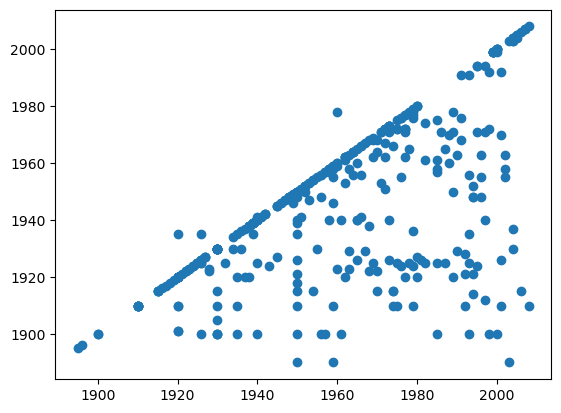

In [68]:
#visualizando a correlação de forma gráfica
fig, ax = plt.subplots()

ax.scatter(teste2.GarageYrBlt,teste2.YearBuilt)

plt.show()

In [69]:
teste['CheckAnos'] = teste.GarageYrBlt == teste.YearBuilt
teste.CheckAnos.value_counts()

True     1127
False     332
Name: CheckAnos, dtype: int64

In [70]:
#apagando a coluna gerada anteriormente
teste = teste.drop('CheckAnos', axis = 1)

In [72]:
teste.loc[teste.GarageCond.isnull(),'YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [73]:
# substituindo as colunas vazias pelo ano de contrução da casa
teste.loc[teste.GarageCond.isnull(),'GarageYrBlt'] = teste.loc[teste.GarageCond.isnull(),'YearBuilt']